## problem statement:- classify the type of drug

## Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.compose import ColumnTransformer
import pickle

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [2]:
# read the data set
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\drug200.csv")

In [3]:
# make the copy of the data set
datac=data.copy()

In [4]:
datac

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## perform EDA to explore the data

In [5]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


We have 6 columns where 4 are categories and 2 are numerical columns and also there are no null values 

In [6]:
# checking the duplicates
datac.duplicated().sum()

0

This data doesn't have any duplicates

In [7]:
# check the data whether it is balanced or imbalanced data and it should be done on basis of class label.
datac["Drug"].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

This data is heavily imbalanced data

In [8]:
datac["Sex"]=datac["Sex"].astype("category")

## preprocessing

In [9]:
# from this data extract the feature variable and class variable
fea_var=datac.iloc[:,0:5]
cl_var=datac.iloc[:,-1]

In [10]:
fea_var.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [11]:
cl_var.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

## EDA after preprocessing

In [12]:
# Before performing EDA we need to split the data because EDA should be performed on train dataset only so that the 
# test data will be unseened data

In [13]:
#splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(fea_var,cl_var,test_size=0.2,random_state=1,stratify=cl_var)

In [14]:
# from this x_train and y_train we need to perform the EDA to know more about the data
# for this firstly concate the x_train and y_train
d_eda=pd.concat([x_train,y_train],axis=1)

In [15]:
d_eda

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
41,58,F,HIGH,NORMAL,14.239,drugB
129,32,F,NORMAL,HIGH,7.477,drugX
65,68,F,NORMAL,NORMAL,27.050,DrugY
39,15,M,NORMAL,HIGH,9.084,drugX
64,60,F,HIGH,HIGH,13.303,drugB
...,...,...,...,...,...,...
96,58,F,LOW,HIGH,38.247,DrugY
185,57,F,NORMAL,NORMAL,25.893,DrugY
66,29,M,HIGH,HIGH,12.856,drugA
132,49,M,LOW,NORMAL,13.598,drugX


In [16]:
d_eda["Sex"].value_counts()

Sex
M    85
F    75
Name: count, dtype: int64

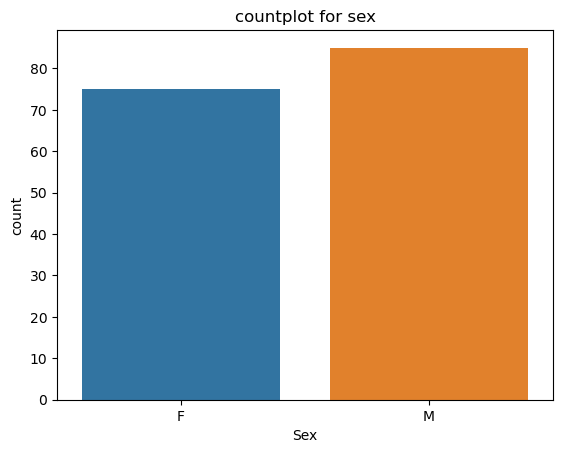

In [17]:
# plotting the countplot to understand the sex column
sns.countplot(x=d_eda["Sex"])
plt.title("countplot for sex")
plt.show()

There are 75 females and 85 males

In [18]:
d_eda["BP"].value_counts()

BP
HIGH      62
NORMAL    49
LOW       49
Name: count, dtype: int64

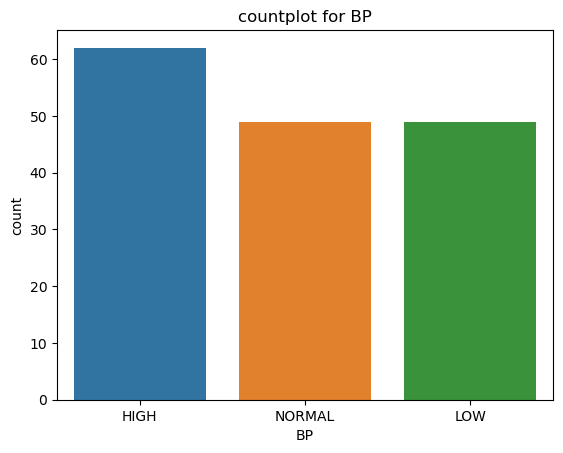

In [19]:
# plotting the countplot to understand the BP column
sns.countplot(x=d_eda["BP"])
plt.title("countplot for BP")
plt.show()

- There are 62 members whose BP is high 
- There are 49 members whose BP is Normal
- There are 49 members whose BP is low

In [20]:
d_eda["Cholesterol"].value_counts()

Cholesterol
HIGH      82
NORMAL    78
Name: count, dtype: int64

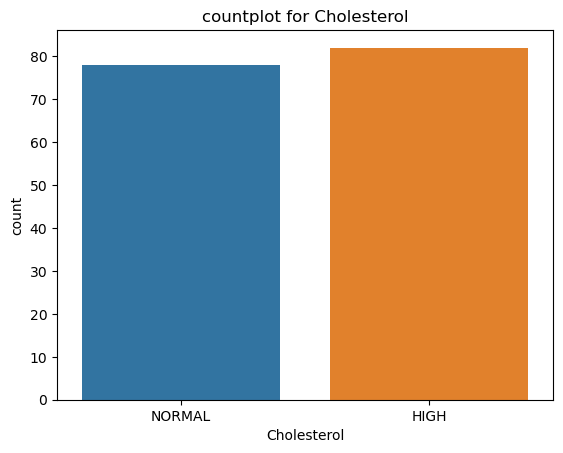

In [21]:
# plotting the countplot to understand the Cholesterol column
sns.countplot(x=d_eda["Cholesterol"])
plt.title("countplot for Cholesterol")
plt.show()

- 82 people has high cholesterol and 78 people has normal cholesterol

In [22]:
d_eda["Drug"].value_counts()

Drug
DrugY    73
drugX    43
drugA    18
drugB    13
drugC    13
Name: count, dtype: int64

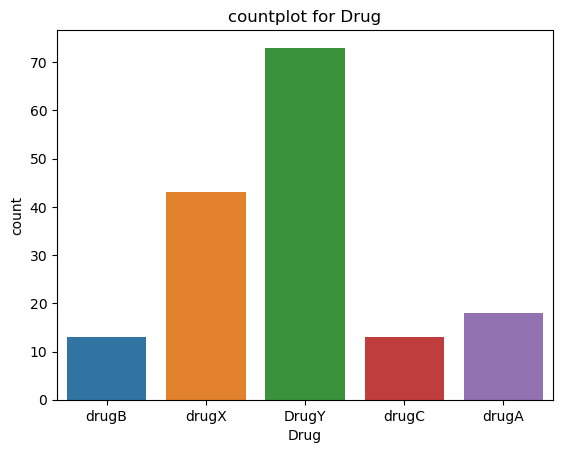

In [23]:
# plotting the countplot to understand the Drug column
sns.countplot(x=d_eda["Drug"])
plt.title("countplot for Drug")
plt.show()

- Drug Y is the drug most of the people are using and then DrugX and DrugC least are DrugB and DurgC

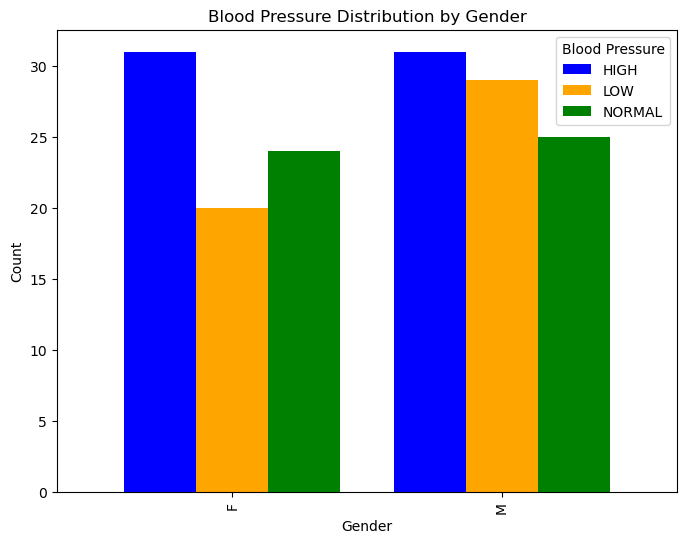

In [24]:
# Group by 'Sex' with respect to 'BP' and calculate the count
grouped_data = d_eda.groupby(['Sex', 'BP']).size().unstack()

# Plotting the data
ax = grouped_data.plot(kind='bar', color=['blue', 'orange', 'green'], figsize=(8, 6), width=0.8)
ax.set_title('Blood Pressure Distribution by Gender')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')
ax.legend(title='Blood Pressure')

plt.show()



35 females and 35 males has high blood pressure and approximaletly 20 females and 30 males has low blood pressure and approximately 24 females and 25 males has normal blood pressure

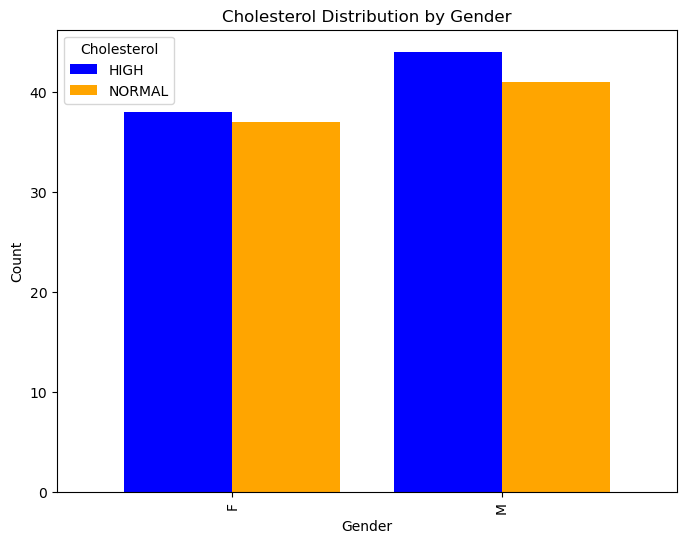

In [25]:
# Group by 'Sex' with respect to 'Cholesterol' and calculate the count
g_data = d_eda.groupby(['Sex', 'Cholesterol']).size().unstack()

# Plotting the data
ax = g_data.plot(kind='bar', color=['blue', 'orange', 'green'], figsize=(8, 6), width=0.8)
ax.set_title('Cholesterol Distribution by Gender')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')
ax.legend(title='Cholesterol')

plt.show()



For both male and female the Cholesterol is high

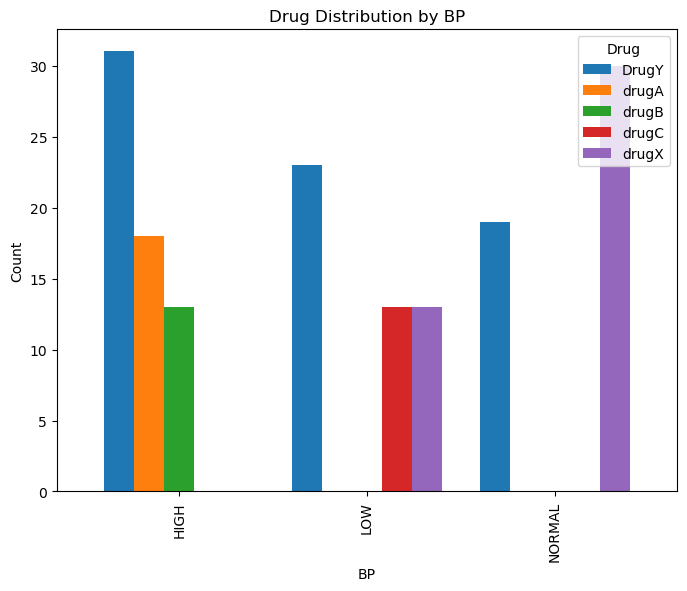

In [26]:
# Group by 'BP' with respect to 'Drug' and calculate the count
g_data1 = d_eda.groupby(['BP', 'Drug']).size().unstack()

# Plotting the data
ax = g_data1.plot(kind='bar', figsize=(8, 6), width=0.8)
ax.set_title('Drug Distribution by BP')
ax.set_ylabel('Count')
ax.set_xlabel('BP')
ax.legend(title='Drug')

plt.show()



- The people with High blood pressure are prescribed with DRUGY mostly and then DRUGA and DRUGB
- people with low blood pressure are also prescribed with DRUGY 
- But people with normal blood pressure are prescribed DRUGX highly

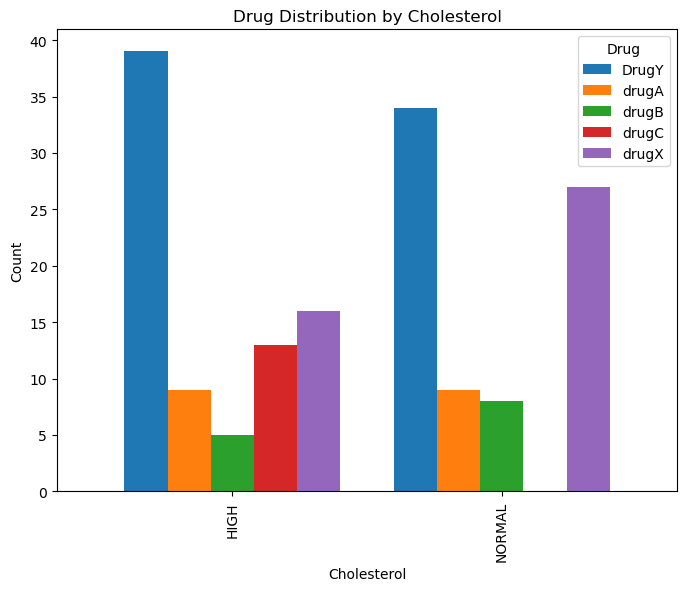

In [27]:
# Group by 'BP' with respect to 'Drug' and calculate the count
g_data1 = d_eda.groupby(['Cholesterol', 'Drug']).size().unstack()

# Plotting the data
ax = g_data1.plot(kind='bar', figsize=(8, 6), width=0.8)
ax.set_title('Drug Distribution by Cholesterol')
ax.set_ylabel('Count')
ax.set_xlabel('Cholesterol')
ax.legend(title='Drug')

plt.show()



- most of the people with high Cholesterol and normal Cholesterol are prescibed with DRUGY and then DRUGX
- least of the people are prexcribed with drugB for both High and Normal Cholesterol
- But DRUGC is only prescribed to the whose cholesterol is high

In [28]:
# correlation between age and Na_to_K
cor_mat=d_eda[['Age', 'Na_to_K']].corr(method = 'pearson')

In [29]:
cor_mat

,Age,Na_to_K
Age,1.000000,-0.046977
Na_to_K,-0.046977,1.000000


The correlation coefficient between Age and Na_to_K is -0.046977, which indicates a weak negative correlation between the two variables. This means that there is a very slight tendency for Na_to_K to decrease as Age increases, but the relationship is not very strong.

In [30]:
## checking whether the numerical columns age and Na_to_k follows Gaussian distribution or not 

Na_to_K


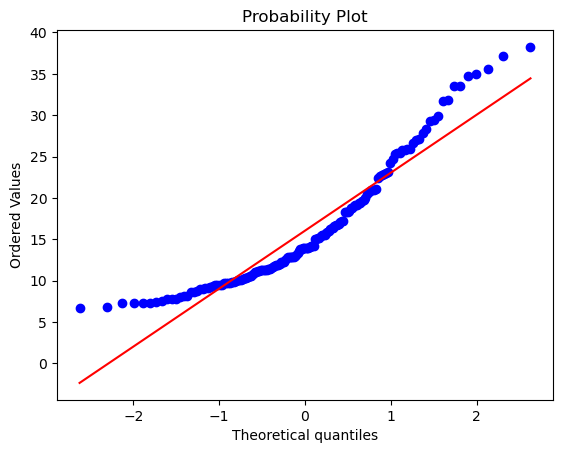

In [31]:
plt.subplot(111)
ss.probplot(d_eda["Na_to_K"],dist='norm', fit=True, plot=plt)
print("Na_to_K")
plt.show()

Age


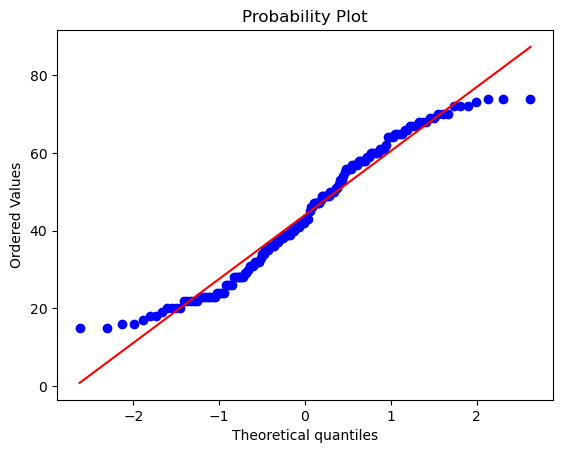

In [32]:
plt.subplot(111)
ss.probplot(d_eda["Age"],dist='norm', fit=True, plot=plt)
print("Age")
plt.show()

These columns are not following the Gaussian distribution so we can transform the columns to follow gaussian distribution

## Feature engineering

In [33]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
41,58,F,HIGH,NORMAL,14.239
129,32,F,NORMAL,HIGH,7.477
65,68,F,NORMAL,NORMAL,27.050
39,15,M,NORMAL,HIGH,9.084
64,60,F,HIGH,HIGH,13.303
...,...,...,...,...,...
96,58,F,LOW,HIGH,38.247
185,57,F,NORMAL,NORMAL,25.893
66,29,M,HIGH,HIGH,12.856
132,49,M,LOW,NORMAL,13.598


In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 41 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          160 non-null    int64   
 1   Sex          160 non-null    category
 2   BP           160 non-null    object  
 3   Cholesterol  160 non-null    object  
 4   Na_to_K      160 non-null    float64 
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 6.5+ KB


In [35]:
y_train

41     drugB
129    drugX
65     DrugY
39     drugX
64     drugB
       ...  
96     DrugY
185    DrugY
66     drugA
132    drugX
49     DrugY
Name: Drug, Length: 160, dtype: object

In [36]:
# seperating the numerical and categorical columns of xtrain to perfom transformation using pipeline
numerical_data=x_train.select_dtypes(include=["int64","float64"])
ordi_data=x_train.select_dtypes(include=["object"])
nomi_data=x_train.select_dtypes(include=["category"])

In [37]:
numerical_data

,Age,Na_to_K
41,58,14.239
129,32,7.477
65,68,27.050
39,15,9.084
64,60,13.303
...,...,...
96,58,38.247
185,57,25.893
66,29,12.856
132,49,13.598


In [38]:
nomi_data

,Sex
41,F
129,F
65,F
39,M
64,F
...,...
96,F
185,F
66,M
132,M


In [39]:
ordi_data

,BP,Cholesterol
41,HIGH,NORMAL
129,NORMAL,HIGH
65,NORMAL,NORMAL
39,NORMAL,HIGH
64,HIGH,HIGH
...,...,...
96,LOW,HIGH
185,NORMAL,NORMAL
66,HIGH,HIGH
132,LOW,NORMAL


## Creating pipeline

In [40]:
#creating a pipeline for numerical columns for imputing missing values, scaling and powertransformation where they are not following the normal distribution
nup=Pipeline([("input_n",SimpleImputer()),("scaling",StandardScaler()),("power_transformation",PowerTransformer())])

In [41]:
nup

Pipeline(steps=[('input_n', SimpleImputer()), ('scaling', StandardScaler()),
                ('power_transformation', PowerTransformer())])

In [42]:
# pipeline for ordinal data for imputing missing values and ordinal encoder for encoding because it is a ordinal data
op=Pipeline([("imput_c",SimpleImputer(strategy="most_frequent")),("encoding",OrdinalEncoder())])

In [43]:
op

Pipeline(steps=[('imput_c', SimpleImputer(strategy='most_frequent')),
                ('encoding', OrdinalEncoder())])

In [44]:
# pipeline for ordinal data for imputing missing values and onehot encoder for encoding because it is a nominal data
np=Pipeline([("input_nomi",SimpleImputer(strategy="most_frequent")),("encoding_nomi",OneHotEncoder())])

In [45]:
np

Pipeline(steps=[('input_nomi', SimpleImputer(strategy='most_frequent')),
                ('encoding_nomi', OneHotEncoder())])

In [46]:
# creating column transformer using pipeline created
col_tp=ColumnTransformer([("numerical",nup,numerical_data.columns),("ordinal",op,ordi_data.columns),("nominal",np,nomi_data.columns)],remainder="passthrough")

In [47]:
col_tp

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('input_n', SimpleImputer()),
                                                 ('scaling', StandardScaler()),
                                                 ('power_transformation',
                                                  PowerTransformer())]),
                                 Index(['Age', 'Na_to_K'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('imput_c',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OrdinalEncoder())]),
                                 Index(['BP', 'Cholesterol'], dtype='object')),
                                ('nominal',
                                 Pipeline(steps=[('input_nomi',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding_nomi',
                                                  OneHotEncoder())]),
                                 Index(['Sex'], dtype='object'))])

In [48]:
# this is the transformed data to transform the train data by using column transformer pipeline 
fx_train=col_tp.fit_transform(x_train)

In [49]:
col_tp.get_feature_names_out()

array(['numerical__Age', 'numerical__Na_to_K', 'ordinal__BP',
       'ordinal__Cholesterol', 'nominal__Sex_F', 'nominal__Sex_M'],
      dtype=object)

In [50]:
fx_train.shape

(160, 6)

In [51]:
# transforms the test data           
fx_test=col_tp.transform(x_test)

In [52]:
y_le = LabelEncoder()
y_train = y_le.fit_transform(y_train)
y_test = y_le.transform(y_test)

## Model creation/Training

In [53]:
# traing the model and testing 
mix_nb=MixedNB(categorical_features=[2,3,4,5])

In [54]:
model=mix_nb.fit(fx_train,y_train)
predict=model.predict(fx_test)
accuracy_score(y_test,predict)

0.975

In [55]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



## Deployment

In [56]:
# this is the pipeline for preprocessing that can be used in final model 
finalp=Pipeline([("preprocessed",col_tp)])

In [57]:
finalp

Pipeline(steps=[('preprocessed',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('input_n',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('power_transformation',
                                                                   PowerTransformer())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imput_c',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Index(['BP', 'Cholesterol'], dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('input_nomi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding_nomi',
                                                                   OneHotEncoder())]),
                                                  Index(['Sex'], dtype='object'))]))])

In [58]:
# final mixed naive bayes model for both numerical,categorical data where this can be used for any model 
model=mix_nb.fit(finalp.fit_transform(x_train),y_train)

C:\Users\LENOVO\anaconda3\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:423: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if categorical_features == 'all':
C:\Users\LENOVO\anaconda3\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.categorical_features == 'all':


In [59]:
# dumping the model

In [60]:
pickle.dump(finalp,open(r"C:\Users\LENOVO\Downloads\finalp_drugs.pkl","wb"))
pickle.dump(model,open(r"C:\Users\LENOVO\Downloads\model_drugs.pkl","wb"))